In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import random
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

2023-11-06 11:55:21.403534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def loss(true, indexFirst, indexLast, modelName):
    return (true[indexFirst:indexLast]-modelName[indexFirst:indexLast]).apply(lambda a : abs(a)).mean()

In [44]:
results = pd.read_csv("preds_1st_fold/Ensamble2.csv")
results["time"] = pd.to_datetime(results["time"])
results2 = pd.read_csv("preds_1st_fold/Model2.csv")
results2["time"] = pd.to_datetime(results2["time"])
results = results.rename(columns={"preds": "Ensamble2"})
results2 = results2.rename(columns={"preds": "Model2"})

results = pd.merge(results,
                   results2[["location", "time", "Model2"]],
                   on=["location", "time"],
                   how="inner")
display(len(results))
#results = results[results["time"].apply(lambda t : t.month in [5, 6])]

comparisonA = results[results["location"].apply(lambda loc : loc == "A")]
comparisonB = results[results["location"].apply(lambda loc : loc == "B")]
comparisonC = results[results["location"].apply(lambda loc : loc == "C")]

display((results["pv_measurement"]-results["Ensamble2"]).apply(lambda a : abs(a)).mean())
display((results["pv_measurement"]-results["Model2"]).apply(lambda a : abs(a)).mean())

9889

128.60650461459642

115.78935521134287

<Axes: title={'center': 'B'}, xlabel='time'>

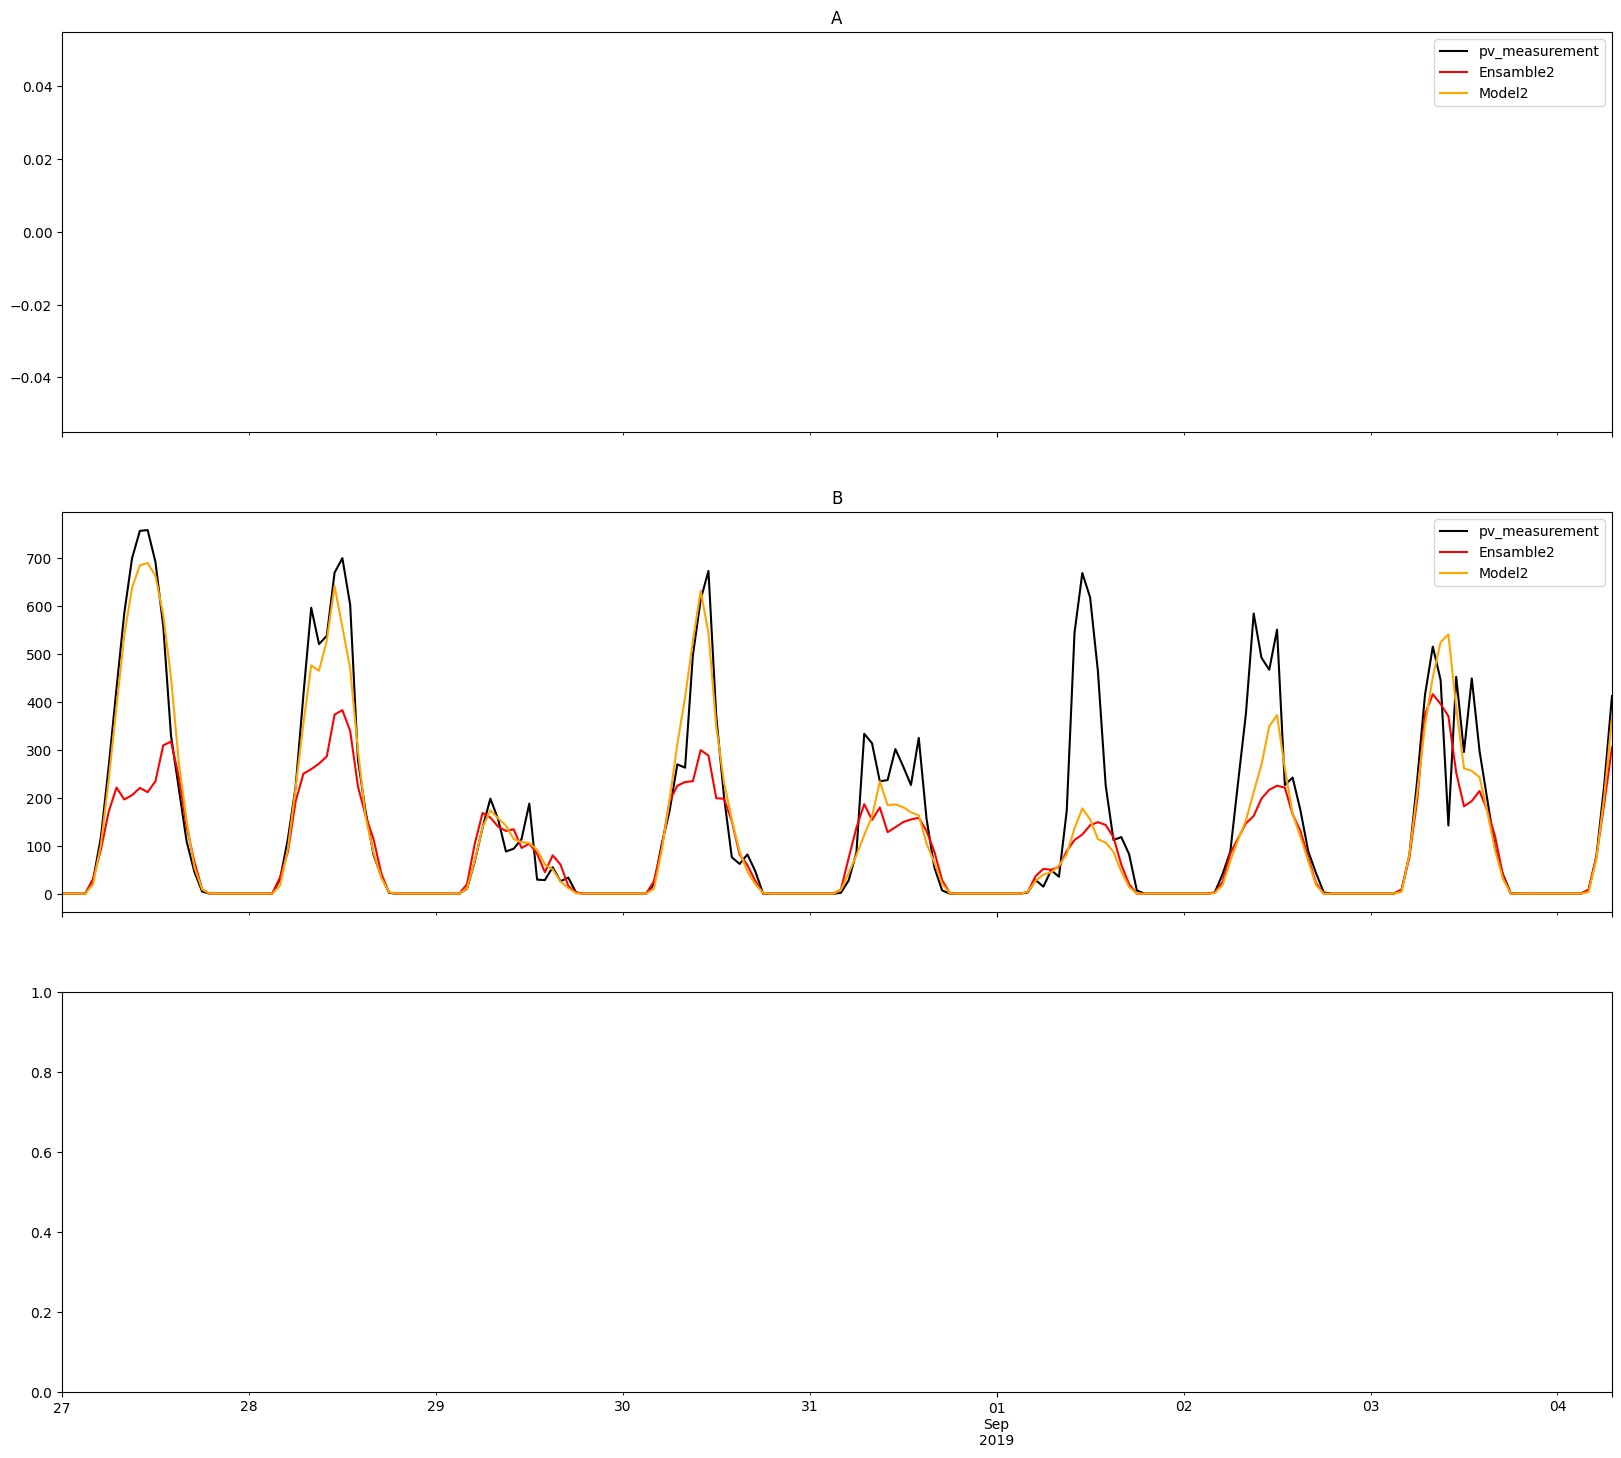

In [70]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharex=True)

indexFirst = 5600
sliceSize = 200

#comparisonA.iloc[indexFirst:indexFirst+sliceSize][['time', 'pv_measurement']].set_index('time').plot(ax=axs[0], title='A', color='black')
#comparisonA.iloc[indexFirst:indexFirst+sliceSize][['time', "Ensamble2"]].set_index('time').plot(ax=axs[0], title='A', color='red')
#comparisonA.iloc[indexFirst:indexFirst+sliceSize][['time', "Model2"]].set_index('time').plot(ax=axs[0], title='A', color='orange')
comparisonB.iloc[indexFirst:indexFirst+sliceSize][['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='B', color='black')
comparisonB.iloc[indexFirst:indexFirst+sliceSize][['time', "Ensamble2"]].set_index('time').plot(ax=axs[1], title='B', color='red')
comparisonB.iloc[indexFirst:indexFirst+sliceSize][['time', "Model2"]].set_index('time').plot(ax=axs[1], title='B', color='orange')
#comparisonC.iloc[:][['time', 'pv_measurement']].set_index('time').plot(ax=axs[2], title='C', color='blue')
#-1000comparisonC.iloc[:][['time', "preds"]].set_index('time').plot(ax=axs[2], title='C', color='red')